Loading dataset...
Preprocessing data...
Training model...

Calculating metrics...
Model Precision: 0.575
Model Recall: 0.111

Creating visualization...


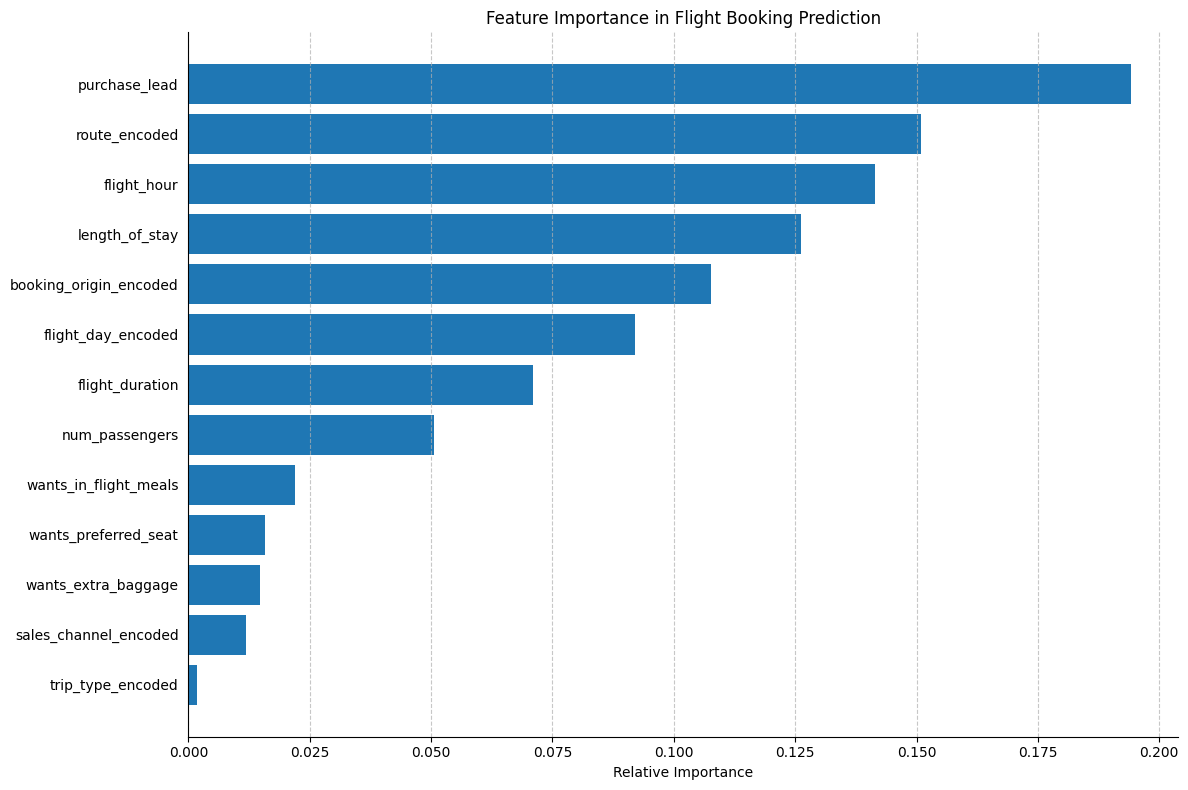

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

print("Loading dataset...")
df = pd.read_csv('/content/drive/MyDrive/customer_booking.csv',encoding="ISO-8859-1")

categorical_columns = ['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin']
numerical_columns = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
                    'flight_duration', 'wants_extra_baggage', 'wants_preferred_seat',
                    'wants_in_flight_meals']

print("Preprocessing data...")
encoders = {}
for col in categorical_columns:
    encoders[col] = LabelEncoder()
    df[col + '_encoded'] = encoders[col].fit_transform(df[col])

feature_columns = numerical_columns + [col + '_encoded' for col in categorical_columns]
X = df[feature_columns]
y = df['booking_complete']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training model...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

importance = rf_model.feature_importances_
feature_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': importance
})
feature_importance = feature_importance.sort_values('importance', ascending=True)

print("\nCalculating metrics...")
y_pred = rf_model.predict(X_test)
precision = np.sum((y_pred == 1) & (y_test == 1)) / np.sum(y_pred == 1)
recall = np.sum((y_pred == 1) & (y_test == 1)) / np.sum(y_test == 1)

print(f"Model Precision: {precision:.3f}")
print(f"Model Recall: {recall:.3f}")

print("\nCreating visualization...")
plt.figure(figsize=(12, 8))
plt.barh(range(len(feature_importance)), feature_importance['importance'])
plt.yticks(range(len(feature_importance)), feature_importance['feature'])
plt.xlabel('Relative Importance')
plt.title('Feature Importance in Flight Booking Prediction')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().tick_params(left=False)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()